In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as im
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import RMSprop
from keras.utils import to_categorical
import zipfile as zf
import os, sys
import re

In [5]:
# train_zip = zf.ZipFile("train_LbELtWX.zip", 'r')
# train_zip.extractall('train_MNIST')
# train_zip.close()

In [8]:
# test_zip = zf.ZipFile("test_ScVgIM0.zip", 'r')
# test_zip.extractall('test_MNIST')
# test_zip.close()

In [2]:
train_folder = 'train_MNIST/train'
test_folder = 'test_MNIST/test'

train_files = [f for f in os.listdir(train_folder) if os.path.isfile(os.path.join(train_folder, f))]
print("Working with {0} images".format(len(train_files)))

Working with 60000 images


In [21]:
for i in range(10):
    print(train_files[i])

52576.png
22625.png
51857.png
3921.png
8673.png
10332.png
10850.png
28268.png
30910.png
32100.png


In [3]:
train_files.sort(key=lambda f: int(re.sub('\D', '', f)))

In [6]:
for i in range(30):
    print(train_files[i])

1.png
2.png
3.png
4.png
5.png
6.png
7.png
8.png
9.png
10.png
11.png
12.png
13.png
14.png
15.png
16.png
17.png
18.png
19.png
20.png
21.png
22.png
23.png
24.png
25.png
26.png
27.png
28.png
29.png
30.png


In [4]:
train_images = []
for f in train_files:
    image = np.asarray(im.imread(os.path.join(train_folder, f)))
    train_images.append(image)
print(train_images[0])

[[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 ...

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]]


In [5]:
len(train_images)

60000

In [58]:
print(np.asarray(train_images).shape)

(60000, 28, 28, 4)


In [8]:
train_labels = pd.read_csv('train_MNIST/train.csv')
train_labels.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [11]:
train_y = train_labels['label']
train_y[4]

0

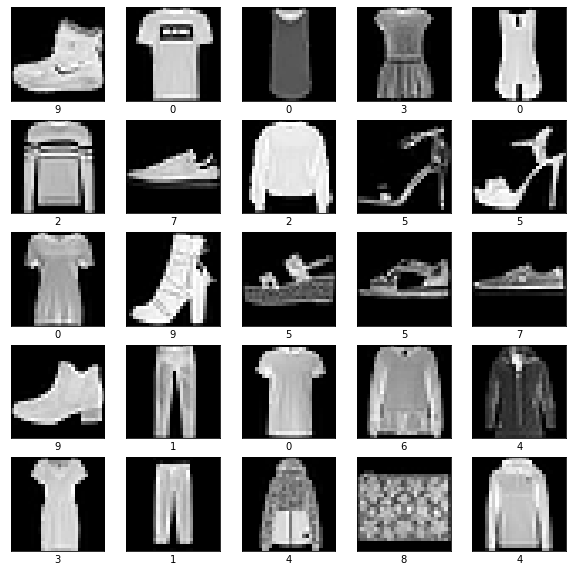

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_y[i])
plt.show()

# Building the model

In [34]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 4)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        592       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               346240    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 348,122
Trainable params: 348,122
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer= 'adam',
              loss = 'mean_squared_error',
              metrics=['accuracy'])

In [61]:
history = model.fit(np.asarray(train_images), to_categorical(train_y), epochs=10)

Epoch 1/10
60000/60000 [==============================] - 240s 4ms/step - loss: 0.0294 - acc: 0.8399
Epoch 2/10
60000/60000 [==============================] - 232s 4ms/step - loss: 0.0198 - acc: 0.8909
Epoch 3/10
60000/60000 [==============================] - 235s 4ms/step - loss: 0.0174 - acc: 0.9024
Epoch 4/10
60000/60000 [==============================] - 237s 4ms/step - loss: 0.0160 - acc: 0.9098
Epoch 5/10
60000/60000 [==============================] - 235s 4ms/step - loss: 0.0150 - acc: 0.9170
Epoch 6/10
60000/60000 [==============================] - 239s 4ms/step - loss: 0.0143 - acc: 0.9225
Epoch 7/10
60000/60000 [==============================] - 243s 4ms/step - loss: 0.0137 - acc: 0.9280
Epoch 8/10
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0131 - acc: 0.9332
Epoch 9/10
60000/60000 [==============================] - 243s 4ms/step - loss: 0.0127 - acc: 0.9355
Epoch 10/10
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0122 - a

In [62]:
print(history)

In [64]:
test_files = [f for f in os.listdir(test_folder) if os.path.isfile(os.path.join(test_folder, f))]
print("Working with {0} images".format(len(test_files)))

Working with 10000 images


In [68]:
for i in range(30):
    print(test_files[i])

60001.png
60002.png
60003.png
60004.png
60005.png
60006.png
60007.png
60008.png
60009.png
60010.png
60011.png
60012.png
60013.png
60014.png
60015.png
60016.png
60017.png
60018.png
60019.png
60020.png
60021.png
60022.png
60023.png
60024.png
60025.png
60026.png
60027.png
60028.png
60029.png
60030.png


In [67]:
test_files.sort(key=lambda f: int(re.sub('\D', '', f)))

In [70]:
test_images = []
for f in test_files:
    image = np.asarray(im.imread(os.path.join(test_folder, f)))
    test_images.append(image)
print(test_images[0])

[[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 ...

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]]


In [71]:
print(np.asarray(test_images).shape)

(10000, 28, 28, 4)


In [73]:
test_labels = pd.read_csv('test_MNIST/test.csv')
test_labels.head()

,id
0,60001
1,60002
2,60003
3,60004
4,60005


In [74]:
predictions = model.predict(np.asarray(test_images), batch_size = 10)

In [80]:
for i in range(10):
    print(predictions[i])

[ 0.00294899  0.00315414  0.01017247  0.0027758   0.00222561  0.07100646
  0.01477723 -0.0226281   0.00820763  0.9025528 ]
[-2.6814751e-02 -1.8936396e-04  1.0775561e+00 -1.0596067e-02
 -6.1666355e-02 -1.7535798e-03  1.0922849e-02  4.5371056e-04
  1.6943440e-03 -1.8649343e-03]
[-0.01086035  1.0069958   0.02718824 -0.05549532 -0.00142857  0.01176959
  0.0071542   0.00154725  0.03076656  0.00120817]
[-1.1846237e-02  1.0541320e+00  1.3102412e-02 -3.6488712e-02
 -6.1186701e-03  4.4493116e-03 -7.9278350e-03 -4.9471110e-04
  1.8740654e-02 -8.5568614e-04]
[ 0.3303525  -0.04748013 -0.04837275 -0.10653833 -0.05823135 -0.00867344
  1.0031003  -0.00137716 -0.04061501 -0.00232981]
[-1.8569119e-02  1.0469321e+00  2.2523917e-02 -5.9728980e-02
 -2.8360590e-02  9.4921589e-03  3.0673265e-02  1.1826782e-03
  2.1112040e-02 -3.5670400e-04]
[-0.00965322 -0.00585544  0.15175682 -0.05010946  0.905758   -0.00193062
  0.03038484 -0.00138792 -0.00589656  0.00392985]
[-0.0074869  -0.01413701  0.15174964 -0.018074

In [81]:
result = []
for val in predictions:
    index = np.argmax(val)
    result.append(index)
for i in range(10):
    print(result[i])

9
2
1
1
6
1
4
6
5
7


In [82]:
test_labels['Results'] = result 

In [83]:
test_labels.head()

,id,Results
0,60001,9
1,60002,2
2,60003,1
3,60004,1
4,60005,6


In [84]:
submissions = pd.read_csv('sample_submission_I5njJSF.csv')
submissions.head()

,id,label
0,60001,0
1,60002,0
2,60003,0
3,60004,0
4,60005,0


In [86]:
submissions['label'] = result
submissions.head()

,id,label
0,60001,9
1,60002,2
2,60003,1
3,60004,1
4,60005,6


In [87]:
submissions['id'] = test_labels['id']
submissions.head()

,id,label
0,60001,9
1,60002,2
2,60003,1
3,60004,1
4,60005,6


In [88]:
names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [90]:
new_labels = []
for label in submissions['label']:
    new_labels.append(names[label])
print(new_labels[:10])

['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']


In [93]:
submissions['label'] = result
submissions.head(30)

,id,label
0,60001,9
1,60002,2
2,60003,1
3,60004,1
4,60005,6
5,60006,1
6,60007,4
7,60008,6
8,60009,5
9,60010,7


In [94]:
pd.DataFrame(submissions, columns=['id', 'label']).to_csv('CNN_Fashion_MNIST_2.csv')